<a href="https://colab.research.google.com/github/rayeli7/Blacknoks/blob/master/challenge_fish_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install split-folders -q
!pip install sweetviz
!pip install augmentor

     |████████████████████████████████| 15.1MB 191kB/s 
     |████████████████████████████████| 81kB 12.9MB/s 
  Found existing installation: tqdm 4.41.1
    Uninstalling tqdm-4.41.1:
      Successfully uninstalled tqdm-4.41.1


In [ ]:
#importing needed libraries

import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf
import cv2
import os
import pathlib
import PIL #Python Imaging Library
import splitfolders
import imageio
import Augmentor



import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline

from tensorflow import keras
from tensorflow import
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data  Augmentation and Cleaning


In [ ]:
#import data
dataset_url = 'https://groups.inf.ed.ac.uk/f4k/GROUNDTRUTH/RECOG/Archive/fishRecognition_GT.tar'
data_dir = tf.keras.utils.get_file('fish_image', origin=dataset_url,  cache_dir='.', untar=True)
data_dir


510918656/510912000 [==============================] - 26s 0us/step


'./datasets/fish_image'

In [ ]:
data_dir = pathlib.Path(data_dir)
total_image_count = len(list(data_dir.glob('*/*.png')))
print(total_image_count)
data_dir



27370


PosixPath('datasets/fish_image')

In [ ]:
#CREATING VARIABLES FOR NUMBER OF IMAGES IN EACH SPECIES
fish_01_len = len(list(data_dir.glob('fish_01/*')))
fish_02_len = len(list(data_dir.glob('fish_02/*')))
fish_03_len = len(list(data_dir.glob('fish_03/*')))
fish_04_len = len(list(data_dir.glob('fish_04/*')))
fish_05_len = len(list(data_dir.glob('fish_05/*')))
fish_06_len = len(list(data_dir.glob('fish_06/*')))
fish_07_len = len(list(data_dir.glob('fish_07/*')))
fish_08_len = len(list(data_dir.glob('fish_08/*')))
fish_09_len = len(list(data_dir.glob('fish_09/*')))
fish_10_len = len(list(data_dir.glob('fish_10/*')))
fish_11_len = len(list(data_dir.glob('fish_11/*')))
fish_12_len = len(list(data_dir.glob('fish_12/*')))
fish_13_len = len(list(data_dir.glob('fish_13/*')))
fish_14_len = len(list(data_dir.glob('fish_14/*')))
fish_15_len = len(list(data_dir.glob('fish_15/*')))
fish_16_len = len(list(data_dir.glob('fish_16/*')))
fish_17_len = len(list(data_dir.glob('fish_17/*')))
fish_18_len = len(list(data_dir.glob('fish_18/*')))
fish_19_len = len(list(data_dir.glob('fish_19/*')))
fish_20_len = len(list(data_dir.glob('fish_20/*')))
fish_21_len = len(list(data_dir.glob('fish_21/*')))
fish_22_len = len(list(data_dir.glob('fish_22/*')))
fish_23_len = len(list(data_dir.glob('fish_23/*')))

In [ ]:
#visualising data using a dataframe
data_dict = {'Species': ['Dascyllus reticulatus', 'Plectroglyphidodon dickii', 'Chromis chrysura', 'Amphiprion clarkii', 'Chaetodon lunulatus', 'Chaetodon trifascialis', 'Myripristis kuntee', 'Acanthurus nigrofuscus', 'Hemigymnus fasciatus', 'Neoniphon sammara', 'Abudefduf vaigiensis', 'Canthigaster valentini', 'Pomacentrus moluccensis', 'Zebrasoma scopas', 'Hemigymnus melapterus', 'Lutjanus fulvus', 'Scolopsis bilineata', 'Scaridae','Pempheris vanicolensis', 'Zanclus cornutus', 'Neoglyphidodon nigroris', 'Balistapus undulatus', 'Siganus fuscescens' ], 
        'Count': [fish_01_len,
                  fish_02_len,
                  fish_03_len,
                  fish_04_len,
                  fish_05_len,
                  fish_06_len,
                  fish_07_len,
                  fish_08_len,
                  fish_09_len,
                  fish_10_len,
                  fish_11_len,
                  fish_12_len,
                  fish_13_len,
                  fish_14_len,
                  fish_15_len,
                  fish_16_len,
                  fish_17_len,
                  fish_18_len,
                  fish_19_len,
                  fish_20_len,
                  fish_21_len,
                  fish_22_len, 
                  fish_23_len]}  
 
df = pd.DataFrame(data_dict)  
df

,Species,Count
0,Dascyllus reticulatus,12112
1,Plectroglyphidodon dickii,2683
2,Chromis chrysura,3593
3,Amphiprion clarkii,4049
4,Chaetodon lunulatus,2534
5,Chaetodon trifascialis,190
6,Myripristis kuntee,450
7,Acanthurus nigrofuscus,218
8,Hemigymnus fasciatus,241
9,Neoniphon sammara,299


In [ ]:
#assigning variables for fish species directory using os module
fish_01_dir = os.path.join('/content/datasets/fish_image/fish_01')
fish_02_dir = os.path.join('/content/datasets/fish_image/fish_02')
fish_03_dir = os.path.join('/content/datasets/fish_image/fish_03')
fish_04_dir = os.path.join('/content/datasets/fish_image/fish_04')
fish_05_dir = os.path.join('/content/datasets/fish_image/fish_05')
fish_06_dir = os.path.join('/content/datasets/fish_image/fish_06')
fish_07_dir = os.path.join('/content/datasets/fish_image/fish_07')
fish_08_dir = os.path.join('/content/datasets/fish_image/fish_08')
fish_09_dir = os.path.join('/content/datasets/fish_image/fish_09')
fish_10_dir = os.path.join('/content/datasets/fish_image/fish_10')
fish_11_dir = os.path.join('/content/datasets/fish_image/fish_11')
fish_12_dir = os.path.join('/content/datasets/fish_image/fish_12')
fish_13_dir = os.path.join('/content/datasets/fish_image/fish_13')
fish_14_dir = os.path.join('/content/datasets/fish_image/fish_14')
fish_15_dir = os.path.join('/content/datasets/fish_image/fish_15')
fish_16_dir = os.path.join('mple
[Search domain researchgate.net] https://www.researchgate.net › publication › 294736219_Technology_Startup_Business_Plan_Sample
Technology Startup Business Plan Sample. February 2016; Pr/content/datasets/fish_image/fish_16')
fish_17_dir = os.path.join('/content/datasets/fish_image/fish_17')
fish_18_dir = os.path.join('/content/datasets/fish_image/fish_18')
fish_19_dir = os.path.join('/content/datasets/fish_image/fish_19')
fish_20_dir = os.path.join('/content/datasets/fish_image/fish_20')
fish_21_dir = os.path.join('/content/datasets/fish_image/fish_21')
fish_22_dir = os.path.join('/content/datasets/fish_image/fish_22')
fish_23_dir = os.path.join('/content/datasets/fish_image/fish_23')


#list containing variables of fish speies dir.
LIST = (fish_06_dir,fish_07_dir,fish_08_dir,fish_09_dir,fish_10_dir,fish_11_dir,fish_12_dir,fish_13_dir, fish_14_dir,fish_15_dir,fish_16_dir,fish_17_dir,fish_18_dir,
     fish_19_dir,fish_20_dir,fish_21_dir,fish_22_dir,fish_23_dir)


For loop to augment , image data that passes through it.

In [ ]:
for fish_dir in LIST:
    p= Augmentor.Pipeline(str(fish_dir),str(fish_dir),'png')
    p.rotate(probability=0.9, max_left_rotation=25, max_right_rotation=25)
    p.flip_left_right(probability=0.5)
    p.flip_top_bottom(probability=0.5)
    p.skew_tilt(probability=0.5)
    p.zoom(probability=0.5, min_factor=0.5, max_factor=1.0)
    p.random_brightness(probability= 0.5, min_factor=1.1, max_factor=1.5)
    p.random_contrast (probability = 0.5, min_factor=1.1, max_factor=1.5)
    p.shear(probability = 0.2, max_shear_left = 21, max_shear_right = 23)
    p.sample(500)

Initialised with 190 image(s) found.
Output directory set to /content/datasets/fish_image/fish_06.

Processing <PIL.Image.Image image mode=RGB size=143x127 at 0x7FBC8E13B790>: 100%|██████████| 500/500 [00:05<00:00, 98.05 Samples/s] 


Initialised with 450 image(s) found.
Output directory set to /content/datasets/fish_image/fish_07.

Processing <PIL.Image.Image image mode=RGB size=79x100 at 0x7FBC9050CC90>: 100%|██████████| 500/500 [00:02<00:00, 171.09 Samples/s]


Initialised with 218 image(s) found.
Output directory set to /content/datasets/fish_image/fish_08.

Processing <PIL.Image.Image image mode=RGB size=100x83 at 0x7FBC8ECFCE10>: 100%|██████████| 500/500 [00:04<00:00, 103.77 Samples/s]


Initialised with 241 image(s) found.
Output directory set to /content/datasets/fish_image/fish_09.

Processing <PIL.Image.Image image mode=RGB size=91x81 at 0x7FBC8E16A590>: 100%|██████████| 500/500 [00:05<00:00, 98.22 Samples/s] 


Initialised with 299 image(s) found.
Output directory set to /content/datasets/fish_image/fish_10.

Processing <PIL.Image.Image image mode=RGB size=111x90 at 0x7FBC8E53B050>: 100%|██████████| 500/500 [00:03<00:00, 135.45 Samples/s]


Initialised with 98 image(s) found.
Output directory set to /content/datasets/fish_image/fish_11.

Processing <PIL.Image.Image image mode=RGB size=87x79 at 0x7FBC8E19BE10>: 100%|██████████| 500/500 [00:05<00:00, 98.81 Samples/s] 


Initialised with 147 image(s) found.
Output directory set to /content/datasets/fish_image/fish_12.

Processing <PIL.Image.Image image mode=RGB size=140x123 at 0x7FBC905185D0>: 100%|██████████| 500/500 [00:04<00:00, 122.66 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/datasets/fish_image/fish_13.

Processing <PIL.Image.Image image mode=RGB size=256x215 at 0x7FBC8E4070D0>: 100%|██████████| 500/500 [00:06<00:00, 78.73 Samples/s]


Initialised with 90 image(s) found.
Output directory set to /content/datasets/fish_image/fish_14.

Processing <PIL.Image.Image image mode=RGB size=123x110 at 0x7FBC8E16AE50>: 100%|██████████| 500/500 [00:03<00:00, 134.89 Samples/s]


Initialised with 42 image(s) found.
Output directory set to /content/datasets/fish_image/fish_15.

Processing <PIL.Image.Image image mode=RGB size=100x82 at 0x7FBC8ECF5ED0>: 100%|██████████| 500/500 [00:04<00:00, 119.34 Samples/s]


Initialised with 206 image(s) found.
Output directory set to /content/datasets/fish_image/fish_16.

Processing <PIL.Image.Image image mode=RGB size=147x175 at 0x7FBC9008C7D0>: 100%|██████████| 500/500 [00:06<00:00, 73.65 Samples/s]


Initialised with 49 image(s) found.
Output directory set to /content/datasets/fish_image/fish_17.

Processing <PIL.Image.Image image mode=RGB size=175x118 at 0x7FBC8ECF5410>: 100%|██████████| 500/500 [00:03<00:00, 137.11 Samples/s]


Initialised with 56 image(s) found.
Output directory set to /content/datasets/fish_image/fish_18.

Processing <PIL.Image.Image image mode=RGB size=119x95 at 0x7FBC8ED15490>: 100%|██████████| 500/500 [00:03<00:00, 137.83 Samples/s]


Initialised with 29 image(s) found.
Output directory set to /content/datasets/fish_image/fish_19.

Processing <PIL.Image.Image image mode=RGB size=127x126 at 0x7FBC90094A90>: 100%|██████████| 500/500 [00:07<00:00, 68.47 Samples/s]


Initialised with 21 image(s) found.
Output directory set to /content/datasets/fish_image/fish_20.

Processing <PIL.Image.Image image mode=RGB size=115x124 at 0x7FBC8E55A190>: 100%|██████████| 500/500 [00:09<00:00, 50.41 Samples/s]


Initialised with 16 image(s) found.
Output directory set to /content/datasets/fish_image/fish_21.

Processing <PIL.Image.Image image mode=RGB size=108x91 at 0x7FBC8ED03350>: 100%|██████████| 500/500 [00:03<00:00, 127.52 Samples/s]


Initialised with 41 image(s) found.
Output directory set to /content/datasets/fish_image/fish_22.

Processing <PIL.Image.Image image mode=RGB size=179x140 at 0x7FBC8E150890>: 100%|██████████| 500/500 [00:05<00:00, 87.46 Samples/s] 


Initialised with 25 image(s) found.
Output directory set to /content/datasets/fish_image/fish_23.

Processing <PIL.Image.Image image mode=RGB size=123x89 at 0x7FBC8E16A990>: 100%|██████████| 500/500 [00:04<00:00, 120.60 Samples/s]


In [ ]:
fish_01_len = len(list(data_dir.glob('fish_01/*')))
fish_02_len = len(list(data_dir.glob('fish_02/*')))
fish_03_len = len(list(data_dir.glob('fish_03/*')))
fish_04_len = len(list(data_dir.glob('fish_04/*')))
fish_05_len = len(list(data_dir.glob('fish_05/*')))
fish_06_len = len(list(data_dir.glob('fish_06/*')))
fish_07_len = len(list(data_dir.glob('fish_07/*')))
fish_08_len = len(list(data_dir.glob('fish_08/*')))
fish_09_len = len(list(data_dir.glob('fish_09/*')))
fish_10_len = len(list(data_dir.glob('fish_10/*')))
fish_11_len = len(list(data_dir.glob('fish_11/*')))
fish_12_len = len(list(data_dir.glob('fish_12/*')))
fish_13_len = len(list(data_dir.glob('fish_13/*')))
fish_14_len = len(list(data_dir.glob('fish_14/*')))
fish_15_len = len(list(data_dir.glob('fish_15/*')))
fish_16_len = len(list(data_dir.glob('fish_16/*')))
fish_17_len = len(list(data_dir.glob('fish_17/*')))
fish_18_len = len(list(data_dir.glob('fish_18/*')))
fish_19_len = len(list(data_dir.glob('fish_19/*')))
fish_20_len = len(list(data_dir.glob('fish_20/*')))
fish_21_len = len(list(data_dir.glob('fish_21/*')))
fish_22_len = len(list(data_dir.glob('fish_22/*')))
fish_23_len = len(list(data_dir.glob('fish_23/*')))

In [ ]:
#visualising data using a dataframe
data = {'Species': ['Dascyllus reticulatus', 'Plectroglyphidodon dickii', 'Chromis chrysura', 'Amphiprion clarkii', 'Chaetodon lunulatus', 'Chaetodon trifascialis', 'Myripristis kuntee', 'Acanthurus nigrofuscus', 'Hemigymnus fasciatus', 'Neoniphon sammara', 'Abudefduf vaigiensis', 'Canthigaster valentini', 'Pomacentrus moluccensis', 'Zebrasoma scopas', 'Hemigymnus melapterus', 'Lutjanus fulvus', 'Scolopsis bilineata', 'Scaridae','Pempheris vanicolensis', 'Zanclus cornutus', 'Neoglyphidodon nigroris', 'Balistapus undulatus', 'Siganus fuscescens' ], 
        'Count': [fish_01_len,
                  fish_02_len,
                  fish_03_len,
                  fish_04_len,
                  fish_05_len,
                  fish_06_len,
                  fish_07_len,
                  fish_08_len,
                  fish_09_len,
                  fish_10_len,
                  fish_11_len,
                  fish_12_len,
                  fish_13_len,
                  fish_14_len,
                  fish_15_len,
                  fish_16_len,
                  fish_17_len,
                  fish_18_len,
                  fish_19_len,
                  fish_20_len,
                  fish_21_len,
                  fish_22_len, 
                  fish_23_len]}  
 
df = pd.DataFrame(data)  
df

,Species,Count
0,Dascyllus reticulatus,12112
1,Plectroglyphidodon dickii,2683
2,Chromis chrysura,3593
3,Amphiprion clarkii,4049
4,Chaetodon lunulatus,2534
5,Chaetodon trifascialis,690
6,Myripristis kuntee,950
7,Acanthurus nigrofuscus,718
8,Hemigymnus fasciatus,741
9,Neoniphon sammara,799


In [ ]:
img =imageio.imread('/content/datasets/fish_image/fish_01/fish_000007020001_00764.png')
img.shape

(77, 88, 3)

In [ ]:
#Split the image dataset into 90/10 train/test
splitfolders.ratio("/content/datasets/fish_image", output="/content/fish_dataset", seed=1337, ratio=(.9, .1), group_prefix=None) # default valuesi

Copying files: 36370 files [00:05, 6675.77 files/s]


In [ ]:

train_datagen = ImageDataGenerator(rescale = 1./255.)

test_datagen = ImageDataGenerator( rescale = 1./255. )


In [ ]:
#preprocessing
training_set = train_datagen.flow_from_directory('/content/fish_dataset/train',
                                                 target_size = (180, 180),
                                                 batch_size = 32,
                                                 class_mode = 'sparse')

Found 32723 images belonging to 23 classes.


In [ ]:
test_set = test_datagen.flow_from_directory('/content/fish_dataset/val',
                                            target_size = (180, 180),
                                            batch_size = 32,
                                            class_mode = 'sparse')


Found 3647 images belonging to 23 classes.


In [ ]:
num_classes = 23

model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dropout(0.5)
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
history= model.fit(
  training_set,
  validation_data=test_set,
  epochs=32,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set))

SyntaxError: ignored

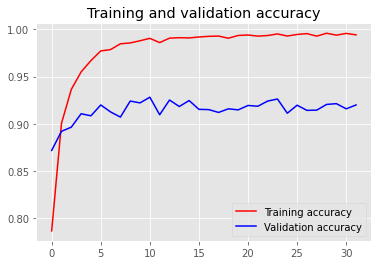

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

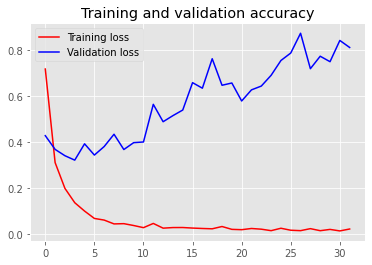

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

In [ ]:
model.save('fish.h5')